# Credit Card Fraud Detection

Fatikhov Artur

### List of content:
1. Introduction
2. Understanding the Data

## 1. Intoduction

In today's digital age, fraud has become a significant challenge across various industries, particularly in financial services. Detecting fraudulent transactions is critical for maintaining the integrity of financial systems, protecting consumers, and minimizing financial losses. This project aims to demonstrate how to build an effective fraud detection model using machine learning techniques, focusing on handling imbalanced datasets—a common issue in fraud detection scenarios.

The primary objective of this project is to create a robust fraud detection model that can accurately identify fraudulent transactions.

#### Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

Importing everything I need in this notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.patches as mpatches 
from sklearn.manifold import TSNE


# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

## 2. Understanding the Data

Loading data

In [2]:
df = pd.read_csv('input/creditcard.csv')

Looking at the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


- We've confirmed that our dataset contains no null values. 

Creating bar plot to see how imbalanced the dataset is 

/tmp/ipykernel_54003/1938097544.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette=['#3498db', '#e74c3c'])


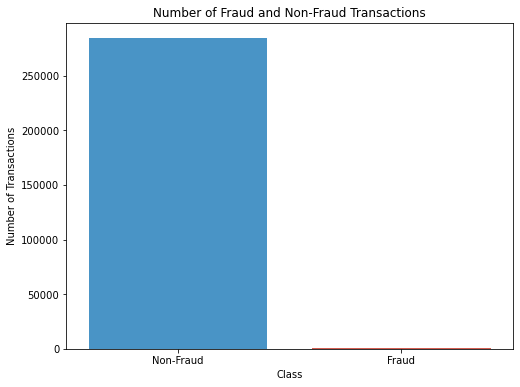

non-fraud transactions 99.827 % total:  284315
fraud transations 0.173 % total:  492


In [6]:
fraud_counts = df['Class'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette=['#3498db', '#e74c3c'])

plt.title('Number of Fraud and Non-Fraud Transactions')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])

plt.show()

total_fraud = fraud_counts[1]
total_non_fraud = fraud_counts[0]


print('non-fraud transactions', round(fraud_counts[0]/len(df) * 100,3), '%', 'total: ', total_non_fraud)
print('fraud transations', round(fraud_counts[1]/len(df) * 100,3), '%', 'total: ', total_fraud)

- There are only 0.173% of fraud transactions, 492 in total, so our data is extremely imbalanced

## 2. Data Preprocessing

Scaling Data:

Scaling is an important aspect of data preprocessing as it facilitates faster convergence, improved accuracy, and enhanced model performance. In this notebook, I will utilize the StandardScaler from the sklearn library to normalize the 'Amount' feature and the RobustScaler from sklearn to preprocess the 'Time' feature.

In [7]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['Amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

In this notebook, I will use undersampling to prevent the model from becoming overfitted. Imbalanced data can cause the model to overlook outlier cases, leading it to incorrectly label all transactions as non-fraudulent.

## 3. Creating dataset

To create a balanced dataset, I will generate a non-fraud dataset by randomly selecting non-fraudulent transactions and concatenate it with all fraudulent transactions. The new dataset (df) will comprise 50% fraud and 50% non-fraud transactions.

In [8]:
non_fraud_df = df[df['Class']==0].sample(n=total_fraud)

In [9]:
new_df = pd.concat((df[df['Class']==1], non_fraud_df))

In [10]:
print(f'new dataset lenth: {len(new_df)}')

new dataset lenth: 984


Plotting new df fraud and non-fraud

/tmp/ipykernel_54003/1743085384.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette=['#3498db', '#e74c3c'])


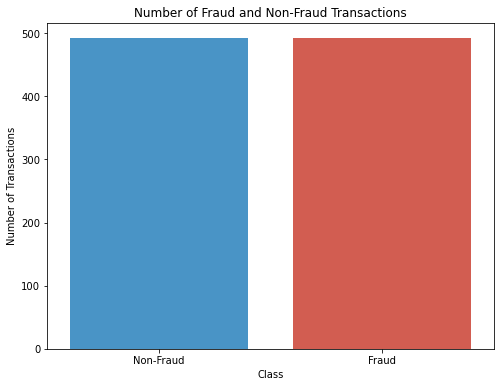

In [11]:
fraud_counts = new_df['Class'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette=['#3498db', '#e74c3c'])

plt.title('Number of Fraud and Non-Fraud Transactions')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])

plt.show()

I will utilize this new dataframe (df) to create training and validation datasets.

Shuffling the data to enhance the model's performance

In [12]:
new_df = new_df.sample(frac=1)

Splitting data to train and test, and creating X, y to train and test

In [13]:
train_df, test_df = train_test_split(new_df, test_size=0.2, random_state=42)

In [14]:
X_train = train_df.drop('Class', axis=1).values
y_train = train_df['Class'].values

In [15]:
X_test = test_df.drop('Class', axis=1).values
y_test = test_df['Class'].values

Now we need to understand the correlation between the labels to better understand the given data

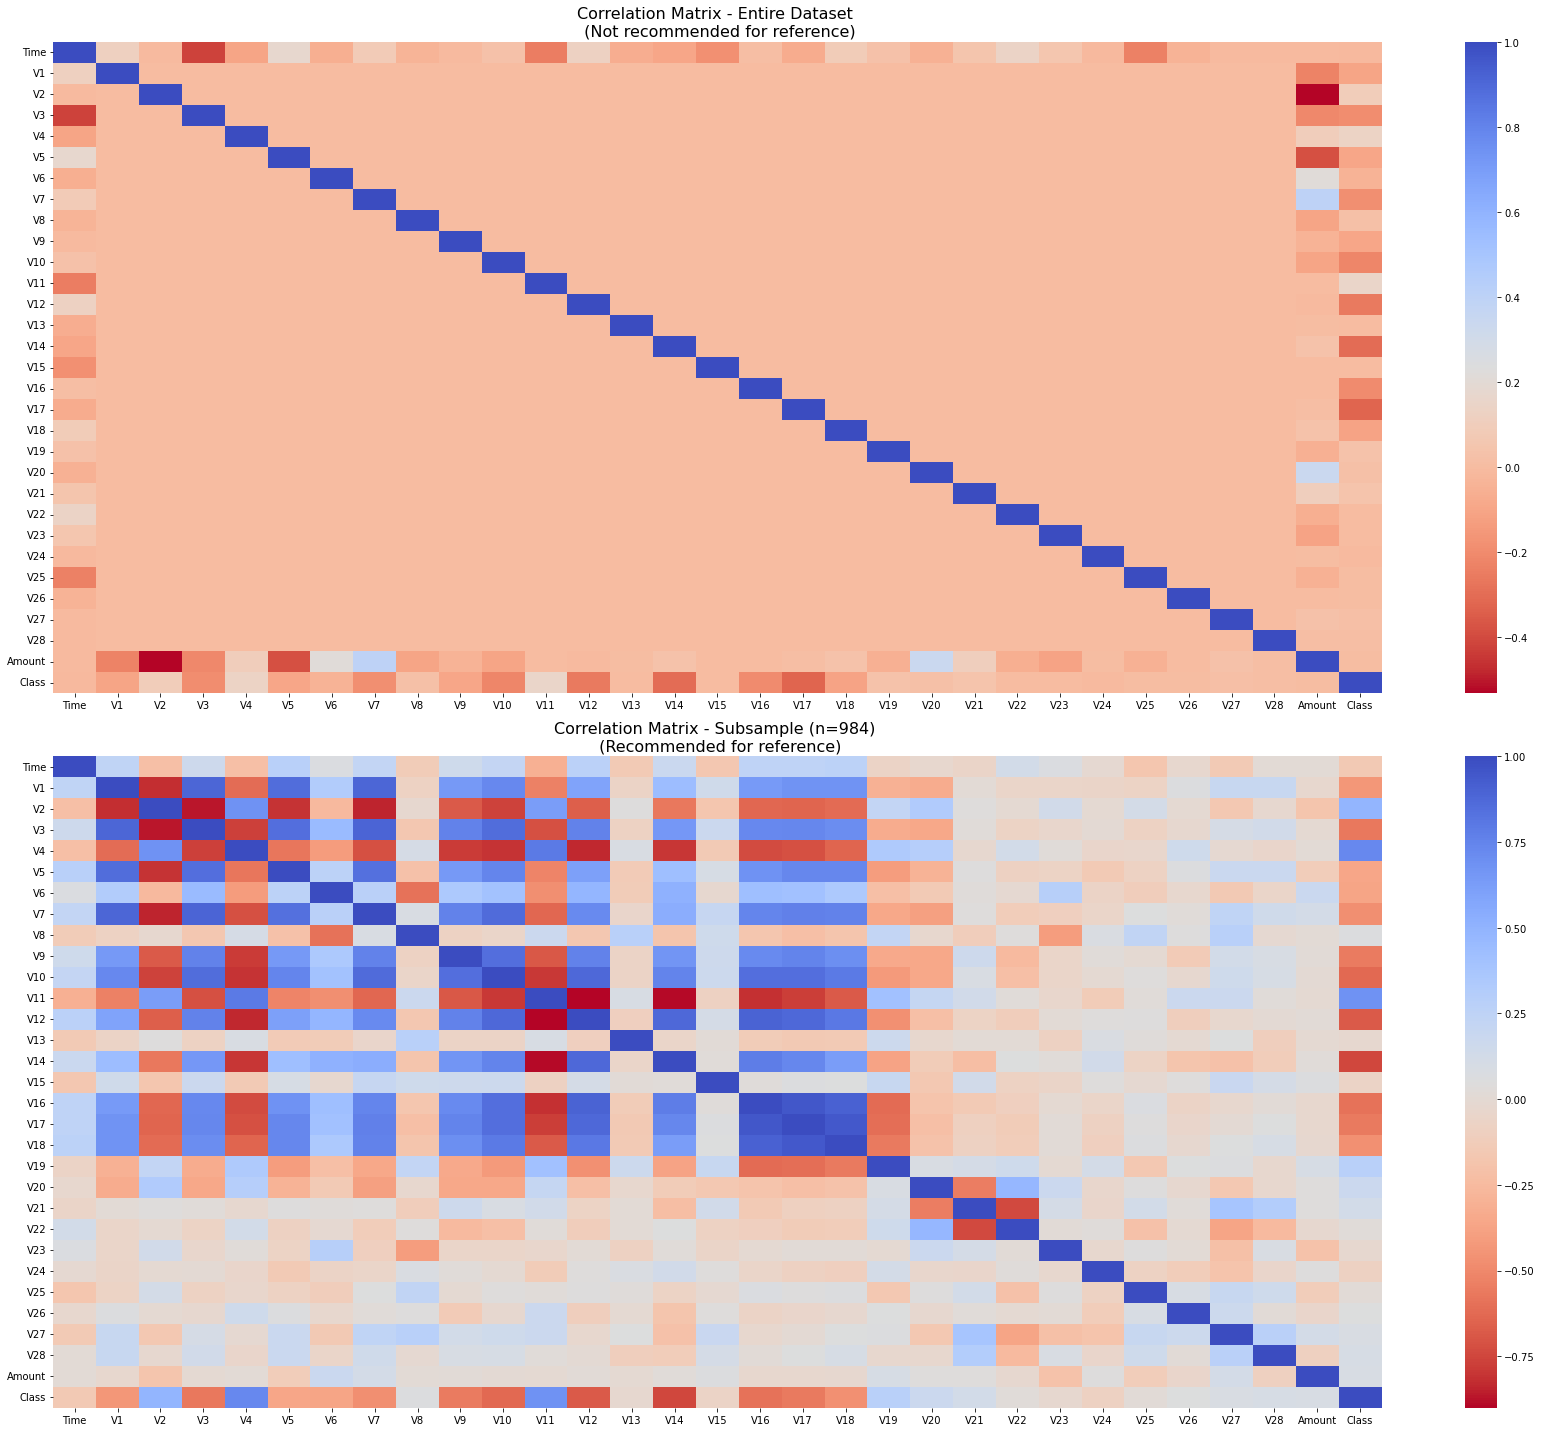

In [27]:
total_sample_size = len(df)
sub_sample_size = len(new_df)

fig, axes = plt.subplots(2, 1, figsize=(24, 20))

corr_total = df.corr()
sns.heatmap(corr_total, cmap='coolwarm_r', annot_kws={'size': 14}, ax=axes[0])
axes[0].set_title("Correlation Matrix - Entire Dataset \n (Not recommended for reference)", fontsize=16)

corr_subsample = new_df.corr()
sns.heatmap(corr_subsample, cmap='coolwarm_r', annot_kws={'size': 14}, ax=axes[1])
axes[1].set_title(f'Correlation Matrix - Subsample (n={sub_sample_size}) \n (Recommended for reference)', fontsize=16)

plt.tight_layout()
plt.show()

#### In fraud detection it's very important to find outliers and get rid of them.

Outliers can significantly impact the performance of fraud detection algorithms in several ways:

- Distorted Models: Outliers can distort statistical models used in fraud detection. Algorithms like logistic regression or decision trees are sensitive to outliers, leading to biased parameter estimates and inaccurate predictions.

- Skewed Decision Boundaries: Outliers can influence the decision boundaries learned by machine learning models. In fraud detection, where the classes (fraudulent and non-fraudulent transactions) are often imbalanced, outliers can lead to skewed decision boundaries, resulting in misclassification of fraudulent transactions.

- Increased False Positives/Negatives: Outliers can increase the number of false positives (legitimate transactions classified as fraud) or false negatives (fraudulent transactions classified as legitimate), reducing the overall accuracy of the fraud detection system.

- Reduced Model Generalization: Outliers can hinder the generalization ability of machine learning models. Models trained on data with outliers may perform well on the training set but poorly on unseen data, leading to decreased performance in real-world scenarios.

- Impact on Performance Metrics: Outliers can affect performance metrics such as precision, recall, and F1 score. In fraud detection, where correctly identifying fraudulent transactions is crucial, outliers can undermine the effectiveness of these metrics.

/tmp/ipykernel_54003/2340221314.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0, 0])  # Correct indexing
/tmp/ipykernel_54003/2340221314.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[0, 1])  # Correct indexing
/tmp/ipykernel_54003/2340221314.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[1, 0])  # Correct indexing
/tmp/ipykernel_54003/2340221314.py:16: Fu

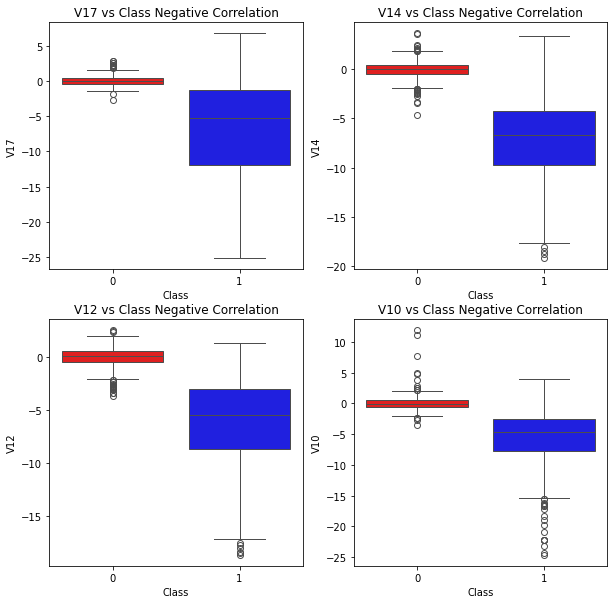

In [28]:
colors = ['red', 'blue']

# Create subplots with the correct number of rows and columns
f, axes = plt.subplots(2, 2, figsize=(10, 10))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0, 0])  # Correct indexing
axes[0, 0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[0, 1])  # Correct indexing
axes[0, 1].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[1, 0])  # Correct indexing
axes[1, 0].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[1, 1])  # Correct indexing
axes[1, 1].set_title('V10 vs Class Negative Correlation')

plt.show()

## 4. Creating and training model

In [18]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [19]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 93.0 % accuracy score
Classifiers:  SVC Has a training score of 93.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 91.0 % accuracy score


In [20]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

/home/artur/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/artur/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

## 5. Evaluating models

Plotting the results to get visual understanding

Logistic Regression Cross Validation Score:  93.9%
Knears Neighbors Cross Validation Score:  93.01%
Support Vector Classifier Cross Validation Score:  93.27%
DecisionTree Classifier Cross Validation Score:  90.99%


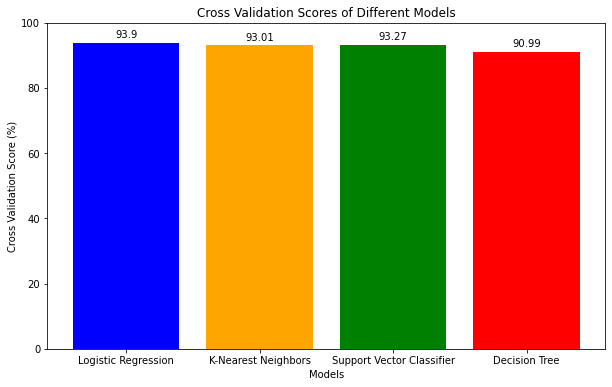

In [21]:
log_reg = LogisticRegression()
knears_neighbors = KNeighborsClassifier()
svc = SVC()
tree_clf = DecisionTreeClassifier()

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5).mean() * 100
knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5).mean() * 100
svc_score = cross_val_score(svc, X_train, y_train, cv=5).mean() * 100
tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5).mean() * 100

print('Logistic Regression Cross Validation Score: ', round(log_reg_score, 2).astype(str) + '%')
print('Knears Neighbors Cross Validation Score: ', round(knears_score, 2).astype(str) + '%')
print('Support Vector Classifier Cross Validation Score: ', round(svc_score, 2).astype(str) + '%')
print('DecisionTree Classifier Cross Validation Score: ', round(tree_score, 2).astype(str) + '%')

models = ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Classifier', 'Decision Tree']
scores = [log_reg_score, knears_score, svc_score, tree_score]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, scores, color=['blue', 'orange', 'green', 'red'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom')

plt.title('Cross Validation Scores of Different Models')
plt.xlabel('Models')
plt.ylabel('Cross Validation Score (%)')
plt.ylim(0, 100)  # Set y-axis limit to 100%

plt.show()

KNN model gave the best result, that is 93.9%

#### Getting ROC AUC, that is important for imbalanced data

In [22]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [23]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9792506720430108
KNears Neighbors:  0.9311479011579818
Support Vector Classifier:  0.982940446650124
Decision Tree Classifier:  0.9073420698924732


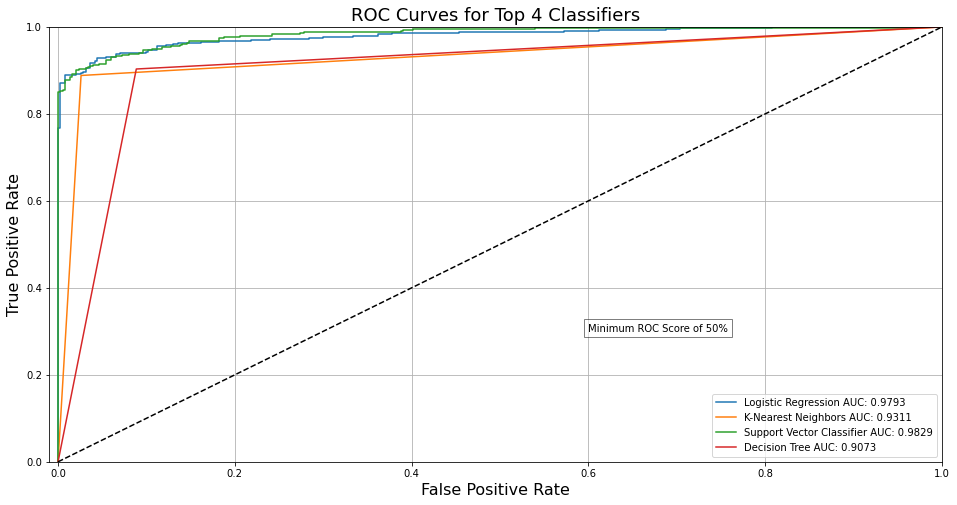

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

log_fpr, log_tpr, log_thresholds = roc_curve(y_train, log_reg_pred)
knears_fpr, knears_tpr, knears_thresholds = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_thresholds = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_thresholds = roc_curve(y_train, tree_pred)

def plot_roc_curves(log_fpr, log_tpr, knears_fpr, knears_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16, 8))
    plt.title('ROC Curves for Top 4 Classifiers', fontsize=18)
    
    plt.plot(log_fpr, log_tpr, label='Logistic Regression AUC: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knears_fpr, knears_tpr, label='K-Nearest Neighbors AUC: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier AUC: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree AUC: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    
    plt.plot([0, 1], [0, 1], linestyle='--', color='black')
    
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.0])
    
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    
    plt.text(0.6, 0.3, 'Minimum ROC Score of 50%', bbox=dict(facecolor='white', alpha=0.5))
    
    plt.legend(loc='lower right')
    plt.grid(True)

plot_roc_curves(log_fpr, log_tpr, knears_fpr, knears_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()



Support Vector Classifier gave the best ROC AUC that is 0.982

## 6. Conclusion

The discrepancy between the SVC's higher ROC AUC (0.982) and KNN's higher accuracy (93.9%) is due to the different aspects these metrics evaluate. ROC AUC measures the model's ability to distinguish between classes across all thresholds, making SVC effective in ranking positive instances higher than negative ones, which is crucial for imbalanced datasets like fraud detection. Accuracy, however, reflects the overall correct predictions and can be misleading in imbalanced scenarios, as a model can achieve high accuracy by predominantly predicting the majority class. Thus, while KNN excels in overall correct predictions, SVC provides better class separation, highlighting its reliability in detecting fraud. For credit card fraud detection, an ROC AUC of 0.982 is an excellent result, indicating that the SVC is highly effective at distinguishing fraudulent transactions from legitimate ones, which is essential for minimizing financial losses and enhancing security. In conclusion, the SVC's performance makes it a highly suitable choice for credit card fraud detection tasks.